In [17]:
import pandas as pd
import numpy as np
from numpy.linalg import inv
import matplotlib.pyplot as plt
from itertools import combinations_with_replacement

In [18]:
df = pd.read_csv("./california_housing_train.csv")

In [19]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000
mean,-119.562108,35.625225,28.589353,2643.664412,539.410824,1429.573941,501.221941,3.883578,207300.912353
std,2.005166,2.137340,12.586937,2179.947071,421.499452,1147.852959,384.520841,1.908157,115983.764387
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.790000,33.930000,18.000000,1462.000000,297.000000,790.000000,282.000000,2.566375,119400.000000
50%,-118.490000,34.250000,29.000000,2127.000000,434.000000,1167.000000,409.000000,3.544600,180400.000000
75%,-118.000000,37.720000,37.000000,3151.250000,648.250000,1721.000000,605.250000,4.767000,265000.000000
max,-114.310000,41.950000,52.000000,37937.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [20]:
df.dropna()
normalized_df = (df - df.min()) / (df.max() - df.min())
y = normalized_df["median_house_value"].values # target
x = normalized_df.drop(columns = ["median_house_value"]).values # input

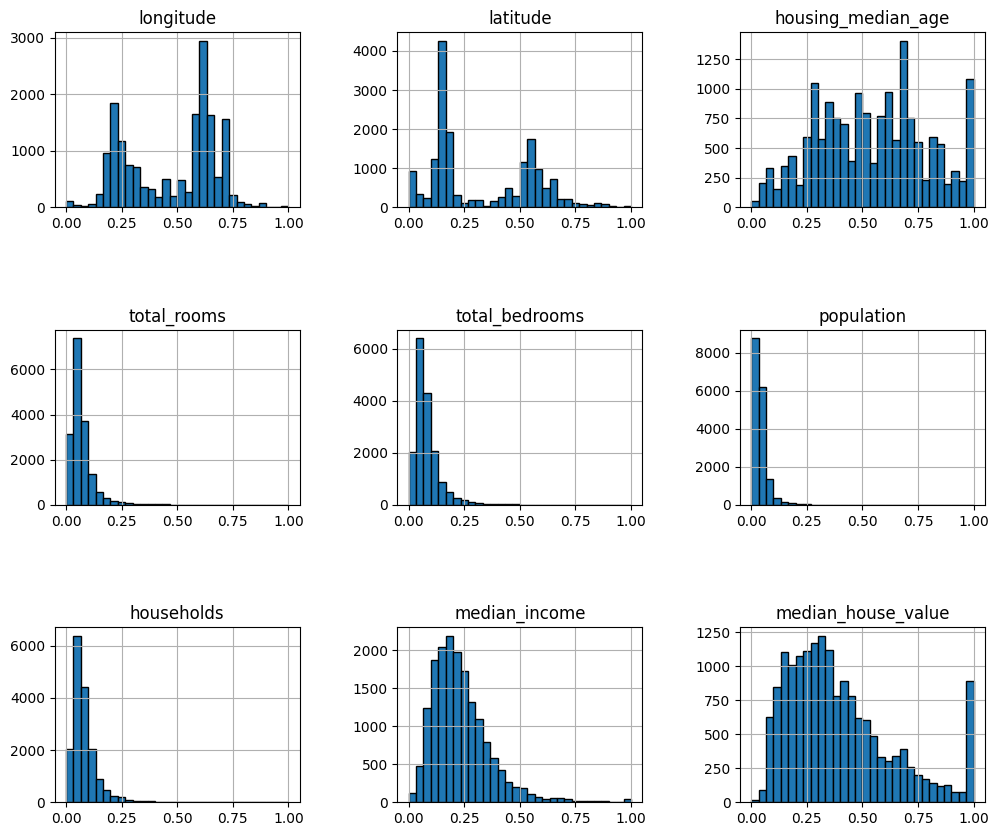

In [21]:
normalized_df.hist(figsize=(12, 10), bins=30, edgecolor="black")
plt.subplots_adjust(hspace=0.7, wspace=0.4)

In [22]:
import random

def train_test_split(x, y, test_size=0.2):
    indices = list(range(len(x)))
    random.shuffle(indices)

    test_size = int(len(x) * test_size)
    train_size = len(x) - test_size

    train_indices = indices[:train_size]
    test_indices = indices[train_size:]

    X_train = np.array([x[i] for i in train_indices])
    X_test = np.array([x[i] for i in test_indices])
    y_train = np.array([y[i] for i in train_indices])
    y_test = np.array([y[i] for i in test_indices])

    return X_train, X_test, y_train, y_test


In [23]:
X_train, X_test, y_train, y_test = train_test_split(x, y)

In [24]:
class Regression:
  def __init__(self):
    self.w = None

  def fit(self,X,y):
    # X = np.column_stack(np.ones(x.shape[0], X))
    self.w = inv(X.T @ X) @ X.T @ y
    
  def score(self,X,y):
    out = X @ self.w
    return 1-(np.dot(y - out,y - out)) / (np.dot(y - np.mean(y),y - np.mean(y)))

  def predict(self, X):
    return self.w @ X

In [25]:
rg = Regression()
rg.fit(X_train,y_train)
rg.score(X_test,y_test)

ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 9 is different from 8)

In [115]:
y = normalized_df["median_house_value"].values
x = normalized_df.drop(columns=["longitude","latitude","median_house_value"]).values
X_train, X_test, y_train, y_test = train_test_split(x, y)

In [116]:
#longitude latitude практически не влияют
rg = Regression()
rg.fit(X_train,y_train)
rg.score(X_test,y_test)

np.float64(0.5596566054733868)

In [117]:
y = normalized_df["median_house_value"].values
x = normalized_df.drop(columns=["housing_median_age","total_rooms","median_house_value"]).values
X_train, X_test, y_train, y_test = train_test_split(x, y)

In [118]:
# housing_median_age total_rooms сильнее влияют
rg = Regression()
rg.fit(X_train,y_train)
rg.score(X_test,y_test)

np.float64(0.5092170154743059)

In [119]:
def polynomial_features(X, degree=2):

    X = np.array(X)

    n_samples, n_features = X.shape

    X_poly = np.ones((n_samples, 1))

    for d in range(1, degree + 1):
        for comb in combinations_with_replacement(range(n_features), d):
            X_poly = np.hstack((X_poly, (X[:, comb] ** 1).prod(axis=1).reshape(-1, 1)))

    return np.array(X_poly)


In [120]:
y = normalized_df["median_house_value"].values
x = normalized_df.drop(columns=["median_house_value"]).values
features = polynomial_features(x,4)
X_train, X_test, y_train, y_test = train_test_split(x, y)

In [121]:
rg = Regression()
rg.fit(X_train,y_train)
rg.score(X_test,y_test)

np.float64(0.6152437689545394)